<a href="https://colab.research.google.com/github/kscharann/Final-year-project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  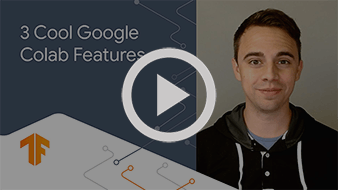
  </a>
</center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout
from numpy import mean
from numpy import std
from numpy import round
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical  # changed
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD  # changed
import pandas as pd
from keras import backend as K
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

import matplotlib.pyplot as plt


(125973, 42)
[0 0 1 ... 0 1 0]
(125973,)
(1, 1, 7, 6)
Epoch 1/10
2638/2638 - 12s - loss: 93.6893 - accuracy: 0.8395 - val_loss: 1.6744 - val_accuracy: 0.9130 - 12s/epoch - 4ms/step
Epoch 2/10
2638/2638 - 8s - loss: 92.0487 - accuracy: 0.9071 - val_loss: 1.1523 - val_accuracy: 0.9330 - 8s/epoch - 3ms/step
Epoch 3/10
2638/2638 - 9s - loss: 44.1289 - accuracy: 0.9130 - val_loss: 4.3855 - val_accuracy: 0.9271 - 9s/epoch - 3ms/step
Epoch 4/10
2638/2638 - 11s - loss: 4.2358 - accuracy: 0.9305 - val_loss: 0.1790 - val_accuracy: 0.9434 - 11s/epoch - 4ms/step
Epoch 5/10
2638/2638 - 8s - loss: 0.4305 - accuracy: 0.9398 - val_loss: 2.9198 - val_accuracy: 0.9529 - 8s/epoch - 3ms/step
Epoch 6/10
2638/2638 - 8s - loss: 0.1515 - accuracy: 0.9484 - val_loss: 0.1093 - val_accuracy: 0.9592 - 8s/epoch - 3ms/step
Epoch 7/10
2638/2638 - 10s - loss: 0.1248 - accuracy: 0.9542 - val_loss: 0.1174 - val_accuracy: 0.9583 - 10s/epoch - 4ms/step
Epoch 8/10
2638/2638 - 7s - loss: 0.1254 - accuracy: 0.9544 - val_los

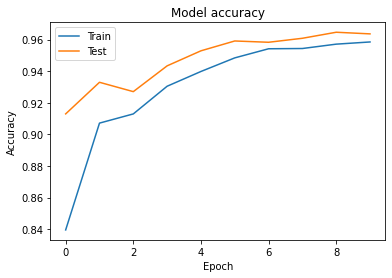

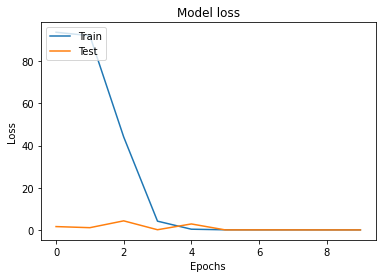

Epoch 1/10
2638/2638 - 11s - loss: 83.1744 - accuracy: 0.8555 - val_loss: 15.4274 - val_accuracy: 0.9343 - 11s/epoch - 4ms/step
Epoch 2/10
2638/2638 - 9s - loss: 282.7337 - accuracy: 0.9193 - val_loss: 147.1265 - val_accuracy: 0.9356 - 9s/epoch - 4ms/step
Epoch 3/10
2638/2638 - 11s - loss: 115.7184 - accuracy: 0.9028 - val_loss: 16.5839 - val_accuracy: 0.8916 - 11s/epoch - 4ms/step
Epoch 4/10
2638/2638 - 8s - loss: 33.0325 - accuracy: 0.9082 - val_loss: 30.6735 - val_accuracy: 0.9112 - 8s/epoch - 3ms/step
Epoch 5/10
2638/2638 - 10s - loss: 7.6920 - accuracy: 0.9153 - val_loss: 8.3776 - val_accuracy: 0.9539 - 10s/epoch - 4ms/step
Epoch 6/10
2638/2638 - 17s - loss: 1.8154 - accuracy: 0.9255 - val_loss: 0.4850 - val_accuracy: 0.9418 - 17s/epoch - 7ms/step
Epoch 7/10
2638/2638 - 9s - loss: 0.3081 - accuracy: 0.9320 - val_loss: 0.1719 - val_accuracy: 0.9519 - 9s/epoch - 4ms/step
Epoch 8/10
2638/2638 - 8s - loss: 0.1707 - accuracy: 0.9420 - val_loss: 0.0941 - val_accuracy: 0.9688 - 8s/epoch 

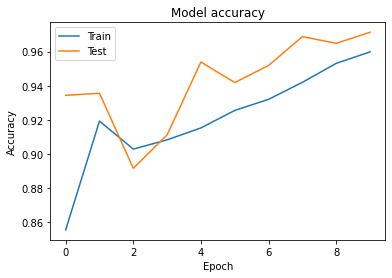

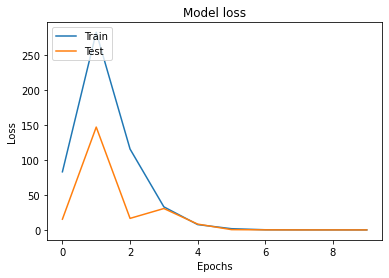

> 53.290
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 1, 7, 32)          224       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 1, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 224)               0         
                                                                 
 dense_23 (Dense)            (None, 100)               22500     
                                                                 
 dense_24 (Dense)            (None, 1)                 101       
                                                                 
Total params: 22,825
Trainable params: 22,825
Non-trainable params: 0
________________________________________

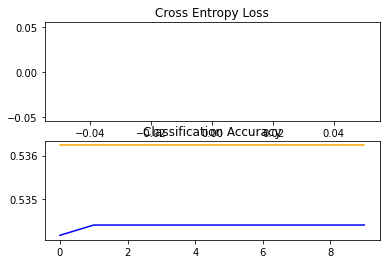

Accuracy: mean=53.290 std=0.000, n=1


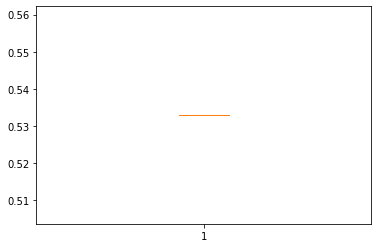

705/705 [==============================] - 1s 2ms/step
Predicted Class by Model 1:  [0.9998871]
Predicted Class by Model 1 (rounded):  [1.]
Actual Class in the Dataset :  1.0
705/705 [==============================] - 1s 2ms/step
Predicted Class by Model 1:  [0.9998688]
Predicted Class by Model 1 (rounded):  [1.]
Actual Class in the Dataset :  1.0


In [ ]:
train = pd.read_csv("./traindata.csv").values
test = pd.read_csv("./testdata.csv").values

print(train[:, 1:].shape)
trainX = train[:, 1:].reshape((train.shape[0], 1, 7, 6))
y_train = train[:, 0]
print(y_train)
print(y_train.shape)

testX = test[:, 1:].reshape(test.shape[0], 1, 7, 6)
y_test = test[:, 0]
print(testX[:1, :].shape)


# MODEL 1
model = Sequential()
K.image_data_format()  # changed
model.add(Convolution2D(15, 1, 1, padding='valid',
          input_shape=(1, 7, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Convolution2D(15, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# MODEL 2
model1 = Sequential()
K.image_data_format()  # changed
model1.add(Convolution2D(15, 1, 1, padding='valid',  # changed
           input_shape=(1, 7, 6), activation='relu'))
model1.add(MaxPooling2D(pool_size=(1, 1)))
model1.add(Convolution2D(15, 1, 1, activation='relu'))
model1.add(MaxPooling2D(pool_size=(1, 1)))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(15, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
#model.add(Dense(10, activation= 'softmax' ))
# Compile model
#model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
model1.compile(optimizer='adam', loss='binary_crossentropy',
               metrics=['accuracy'])


filepath = "best_model.hdf5"
checkpoint = ModelCheckpoint(
    filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

X = np.asarray(trainX).astype('float32')
Y = np.asarray(y_train).astype('float32')
history = model1.fit(X, Y, validation_split=0.33, epochs=10, verbose=2)
print("\\nTraining Performance Metrics")
print(history.history.keys())
loss1, acc1 = model1.evaluate(testX, y_test, verbose=2)
print("\\nTesting Performance Metrics")
print("Loss: ", loss1)
print("Accuracy: ", acc1)
print("MODEL Summary ", model1.summary())

# MODEL 2 - Plot
print("MODEL 2 - Performance Metrics")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# MODEL 1 - RUNNING....
history1 = model.fit(X, Y, validation_split=0.33, epochs=10, verbose=2)
print(history1.history.keys())
loss2, acc2 = model.evaluate(testX, y_test, verbose=2)
print("\\nTesting Accuracy and Loss")
print("Loss: ", loss2)
print("Acc: ", acc2)
print("\\nMODEL 1 SUMMARY")
model.summary()

# MODEL 1 - Plot
print("MODEL 1 - Performance Metrics")
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# MODEL 3


def define_model():
    model2 = Sequential()
    model2.add(Conv2D(32, (1, 1), activation='relu', kernel_initializer='he_uniform', input_shape=(1, 7, 6)))
    model2.add(MaxPooling2D((1, 1)))
    model2.add(Flatten())
    model2.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model2.add(Dense(1, activation='sigmoid'))
# compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model2.compile(optimizer=opt, loss='binary_crossentropy',
                   metrics=['accuracy'])
    return model2


def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
# prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
# enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
    # print(\"Hi\",model.summary())
    # select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # fit model
    X = np.asarray(trainX).astype('float32')
    Y = np.asarray(trainY).astype('float32')
    XTest = np.asarray(testX).astype('float32')
    YTest = np.asarray(testY).astype('float32')
    history = model.fit(X, Y, validation_split=0.33,
                        epochs=10, batch_size=32, verbose=0)
    # evaluate model\n",
    _, acc = model.evaluate(XTest, YTest, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # append scores
    scores.append(acc)
    histories.append(history)
    print("Model Summary", model.summary())
    print("\nPrection by - Model 3")
    yhat = model.predict(testX)
    print(yhat[0])
    print(testY[0])
    return scores, histories


def summarize_diagnostics(histories):
    for i in range(len(histories)):
       # plot loss
        pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_accuracy'],
                color='orange', label='test')
    pyplot.show()


def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' %
          (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()


def run_test_harness():
    # evaluate model4
    scores, histories = evaluate_model(X, Y)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)


run_test_harness()

# Prediction By - MODEL 1
yhat = model.predict(testX)
print("Predicted Class by Model 1: ", yhat[0])
print("Predicted Class by Model 1 (rounded): ", round(yhat[0]))
print("Actual Class in the Dataset : ", y_test[0])

# Prediction By - MODEL 2
yhat = model1.predict(testX)
print("Predicted Class by Model 1: ", yhat[0])
print("Predicted Class by Model 1 (rounded): ", round(yhat[0]))
print("Actual Class in the Dataset : ", y_test[0])


<div class="markdown-google-sans">
  <h1>What is Colab?</h1>
</div>

Colab, or ‘Colaboratory’, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a <strong>student</strong>, a <strong>data scientist</strong> or an <strong>AI researcher</strong>, Colab can make your work easier. Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> to find out more, or just get started below!

<div class="markdown-google-sans">

## <strong>Getting started</strong>
</div>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

For example, here is a <strong>code cell</strong> with a short Python script that computes a value, stores it in a variable and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut 'Command/Ctrl+Enter'. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine <strong>executable code</strong> and <strong>rich text</strong> in a single document, along with <strong>images</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To find out more, see <a href="/notebooks/basic_features_overview.ipynb">Overview of Colab</a>. To create a new Colab notebook you can use the File menu above, or use the following link: <a href="http://colab.research.google.com#create=true">Create a new Colab notebook</a>.

Colab notebooks are Jupyter notebooks that are hosted by Colab. To find out more about the Jupyter project, see <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyse and visualise data. The code cell below uses <strong>numpy</strong> to generate some random data, and uses <strong>matplotlib</strong> to visualise it. To edit the code, just click the cell and start editing.

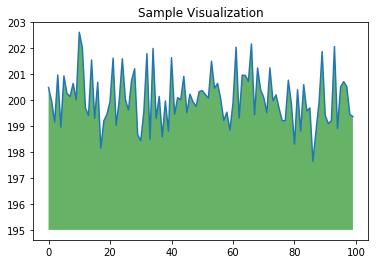

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>. Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

<div class="markdown-google-sans">

## More resources

### Working with notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with data
</div>

- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine learning crash course

<div>

These are a few of the notebooks from Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo voice swap</a>: Use Nvidia NeMo conversational AI toolkit to swap a voice in an audio fragment with a computer-generated one.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.
